                                  THIS IS MY FIRST MINICAP PROJECT 

# Importing libraries

In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
import numpy as np

In [5]:
import pymysql

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
pip install mysql-connector-python

In [8]:
pip install pymysql

In [9]:
##for connecting sql and python

In [10]:
connection = pymysql.connect(host="127.0.0.1", user="root", password="Ankita@1998", database="minicap1")

In [11]:
query = "SELECT * FROM crime_data"
df = pd.read_sql(query, connection)


In [12]:
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


# Spatial Analysis:

#1-Where are the geographical hotspots for reported crimes?

<Axes: xlabel='LON', ylabel='LAT'>

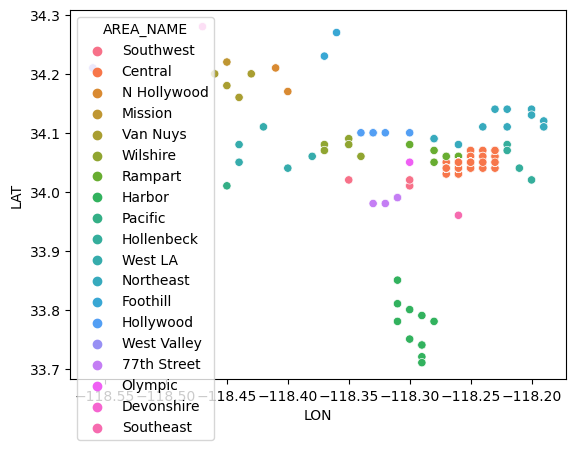

In [14]:
sns.scatterplot(x='LON',y='LAT',hue='AREA_NAME',data=df)

In [ ]:
#analysis
#1-The scatter plot appears to show a positive correlation between two variables,likely representing a geographical distribution

#2-Latitude:
#Values range from approximately 33.7 to 34.3.
#Most data points are clustered between 33.9 and 34.1.
#3-Longitude:
#Values range from approximately -118.55 to -118.2.
#Most data points are clustered between -118.4 and -118.3.

# Victim Demographics:

# 1- What is the distribution of victim ages in reported crimes?

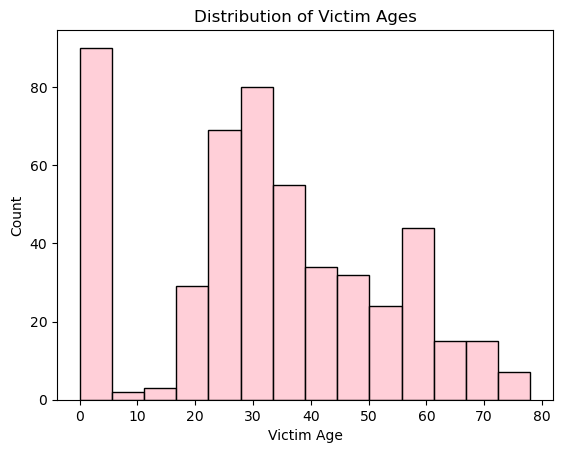

In [16]:
sns.histplot(df["Vict_Age"], color="pink",)
plt.title("Distribution of Victim Ages")
plt.xlabel("Victim Age")
plt.show()


In [17]:
#analysis
#1-The distribution of victim ages is skewed to the left. This means that there are more younger victims than older victims.
#2-The median victim age is around 30 years old.
#3-There is a tail of older victims, extending up to around 80 years old.
#4-There are no victims under the age of 10.

# 3-IS THERE ANY SIGNIFICANT DIFFRENCE BETWEEN CRIME RATE BETWEEN MALE AND FEMALES

In [19]:
sql_vict_sex='''
select vict_sex from crime_data;'''


In [20]:
df_vict_sex=pd.read_sql_query(sql_vict_sex,connection)
df_vict_sex

,vict_sex
0,F
1,M
2,F
3,X
4,M
...,...
494,M
495,M
496,M
497,F


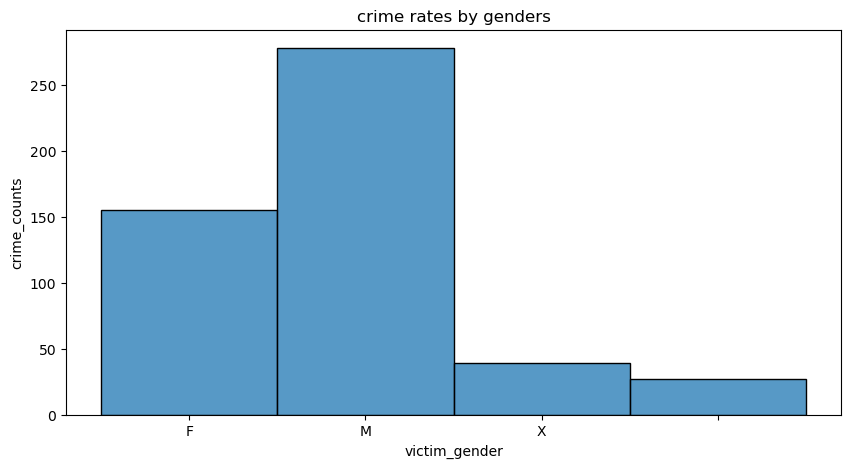

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df_vict_sex["vict_sex"])
plt.title("crime rates by genders")
plt.xlabel("victim_gender")
plt.ylabel("crime_counts")
plt.show()

In [22]:
##ANALYSIS
#THIS IS A GRAPHICAL PRESENTATION OF DIFFERENCE BETWEEN CRIME RATE OF MALE AND FEMALE
#AS PAR THE GRAPH WE CAN SAY MALES HAVE THE HIGHER CRIME RATE THAN FEMALE
#AND THE NO. IS STILL INCREASING

# Location Analysis:

#4-Where do most crimes occur based on the "Location" column?

In [24]:
df["Location"].value_counts()

800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
                      ..
14600 VANOWEN ST       1
600 N ALAMEDA ST       1
FLOWER                 1
400 COLYTON ST         1
2600 S FIGUEROA ST     1
Name: Location, Length: 365, dtype: int64

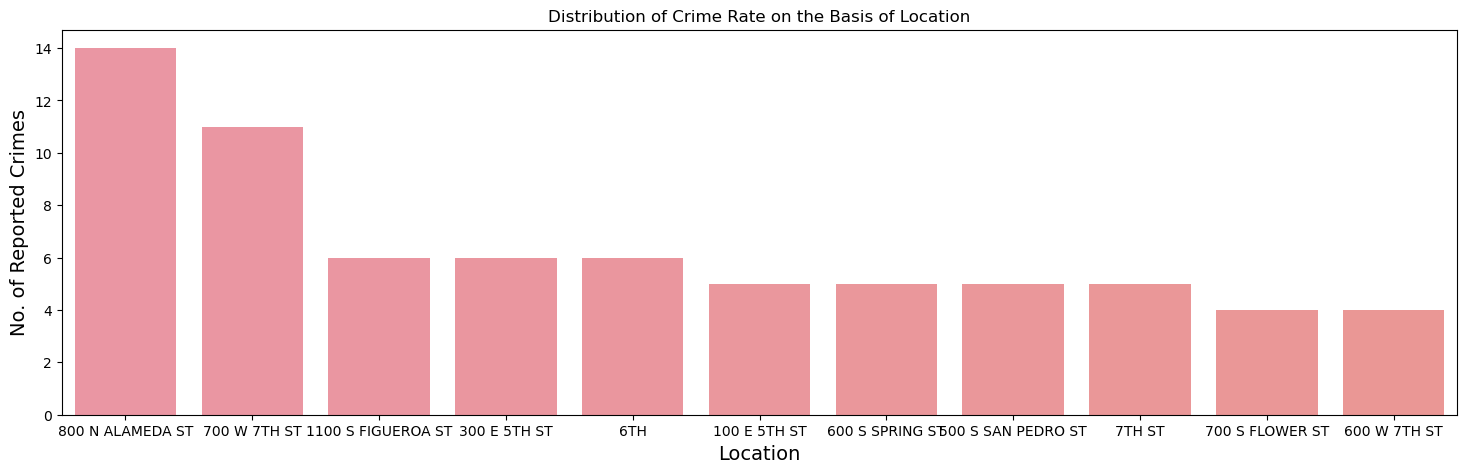

In [29]:
plt.figure(figsize=(18,5))
plt.title('Distribution of Crime Rate on the Basis of Location')
sns.countplot(x=df["Location"], order=df['Location'].value_counts().index)
plt.xlim(-0.5,10.5)
plt.xlabel('Location', fontsize=14)
plt.ylabel('No. of Reported Crimes', fontsize=14)
plt.show()

In [ ]:
#analysis
#1-IN THIS QUESTION IT WAS SAID THAT WE NEED TO FIND THE CRIME RATE ON THE BASIS OF CRIME CODE SO FOE THAT countplot WAS THE BEST CH
#2-It also attempts to create a bar chart showing the crime count for each top location
#3-and the top location is 800 n alameda st

# Crime Code Analysis:

# 5-What is the distribution of reported crimes based on Crime Code?

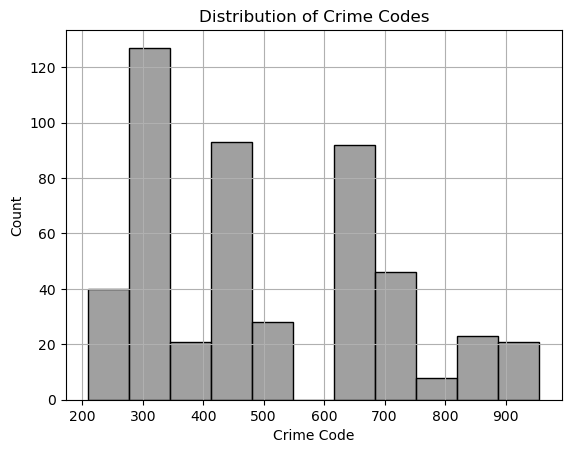

In [30]:

sns.histplot(df["Crm_Cd"],color='grey')

plt.title("Distribution of Crime Codes")

plt.xlabel("Crime Code")

plt.grid(True)

plt.show()

In [ ]:
#ANALYSIS
#1-IN THIS QUESTION IT WAS SAID THAT WE NEED TO FIND THE CRIME RATE ON THE BASIS OF CRIME CODE SO FOE THAT HISTOGRAM WAS THE BEST CHOICE
#2-Court 400 has the highest number of crime codes, followed by court 300.
#3-Courts 200, 500, and 600 have the lowest number of crime codes.
#4-The distribution of crime codes is skewed to the right, meaning that there are more crime codes in the higher courts.